## Crafting New Features: Unlocking Hidden Information

### Feature Creation (Feature Engineering)
Feature creation is the process of generating new features from existing data to improve machine learning model performance.

#### Why Feature Creation?
- Improves model accuracy by capturing complex patterns
- Helps models learn non-linear relationships
- Makes features more meaningful and interpretable
- Helps satisfy model assumptions (e.g., linearity)

#### Common Feature Creation Techniques
1. **Combining Features**
   - Use arithmetic operations like add, subtract, multiply, divide
   - Example: Total_Price = Quantity × Price

2. **Polynomial Features**
   - Create interaction and power terms
   - Helps models learn non-linear relationships
   - Example: x, x², x³, x₁×x₂


In [1]:
import pandas as pd

In [4]:
data = {
    'customer_id': [1, 2, 3, 4, 5],
    'total_spent': [150.50, 220.75, 80.00, 300.25, 110.00],
    'number_of_orders': [3, 5, 2, 7, 4]
}
df = pd.DataFrame(data)
print(df)

   customer_id  total_spent  number_of_orders
0            1       150.50                 3
1            2       220.75                 5
2            3        80.00                 2
3            4       300.25                 7
4            5       110.00                 4


In [6]:
# Creating new Features
#  1: Create Average Order Value (AOV) => Combining Features Example
df.loc[:, 'average_order_value'] = df['total_spent'] / df['number_of_orders']  # created this new feature for all rows present in dataset
print("DataFrame with new 'average_order_value' feature:")
print(df)

DataFrame with new 'average_order_value' feature:
   customer_id  total_spent  number_of_orders  average_order_value
0            1       150.50                 3            50.166667
1            2       220.75                 5            44.150000
2            3        80.00                 2            40.000000
3            4       300.25                 7            42.892857
4            5       110.00                 4            27.500000


In [7]:
# Polynomial Feature Example
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)
print(df)

   feature1  feature2
0         1         2
1         2         3
2         3         4
3         4         5
4         5         6


In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the data
# poly.fit_transform returns a NumPy array
poly_features = poly.fit_transform(df)

# Get the names of the new features
# poly.get_feature_names_out() is available from scikit-learn 1.0+
# For older versions, you might need to construct them manually or use a helper function.
# Assuming scikit-learn 1.0+ for simplicity.
feature_names = poly.get_feature_names_out(['feature1', 'feature2'])

# Convert the NumPy array back to a Pandas DataFrame for better readability
poly_df = pd.DataFrame(poly_features, columns=feature_names)

print("DataFrame with Polynomial and Interaction Features (degree=2):")
print(poly_df)

DataFrame with Polynomial and Interaction Features (degree=2):
   feature1  feature2  feature1^2  feature1 feature2  feature2^2
0       1.0       2.0         1.0                2.0         4.0
1       2.0       3.0         4.0                6.0         9.0
2       3.0       4.0         9.0               12.0        16.0
3       4.0       5.0        16.0               20.0        25.0
4       5.0       6.0        25.0               30.0        36.0


## Handling Missing Values During Feature Engineering

Missing values should be handled before feature creation to avoid errors and biased models.

### Why Handle Missing Values?
- Prevents calculation errors (NaN propagation)
- Avoids biased feature representation
- Ensures compatibility with ML algorithms

### Common Strategies
1. **Imputation**
 Fill missing values with estimated values
2. **Indicator Variables**
 Add a binary feature to mark missing values
3. **Deletion**
 Remove rows/columns (use cautiously)

### Imputation Techniques
- **Mean / Median**: Numerical features (median for skewed data)
- **Mode**: Categorical features
- **Constant Value**: Use 0, -1, or "Unknown"
- **Model-Based**: Predict missing values using ML models (KNN, regression)

### Missing Value Indicators
- Create a binary feature (e.g., `income_is_missing`)
- Helps model learn patterns related to missingness


In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
data = {
    'feature_A': [1.0, 2.0, np.nan, 4.0, 5.0, np.nan],
    'feature_B': [10, np.nan, 30, 40, np.nan, 60],
    'feature_C': ['X', 'Y', 'X', np.nan, 'Y', 'Z'],
    'feature_D': [100, 200, 300, 400, 500, 600]
}
df = pd.DataFrame(data)
print(df.head())

   feature_A  feature_B feature_C  feature_D
0        1.0       10.0         X        100
1        2.0        NaN         Y        200
2        NaN       30.0         X        300
3        4.0       40.0       NaN        400
4        5.0        NaN         Y        500


In [24]:
print('Missing values per column:', df.isnull().sum())

Missing values per column: feature_A    2
feature_B    2
feature_C    1
feature_D    0
dtype: int64


In [25]:
# --- Strategy 1: Imputation using Pandas ---
# Median imputation for numerical features (robust to outliers)
df_imputed_pandas = df.copy()
median_A = df_imputed_pandas['feature_A'].median()
df_imputed_pandas['feature_A'].fillna(median_A, inplace=True)

median_B = df_imputed_pandas['feature_B'].median()
df_imputed_pandas['feature_B'].fillna(median_B, inplace=True)

# Mode imputation for categorical features
mode_C = df_imputed_pandas['feature_C'].mode()[0] # mode() returns a Series
df_imputed_pandas['feature_C'].fillna(mode_C, inplace=True)

print("DataFrame after Pandas imputation (median/mode):")
print(df_imputed_pandas)
print("Missing values count after Pandas imputation:")
print(df_imputed_pandas.isnull().sum())

DataFrame after Pandas imputation (median/mode):
   feature_A  feature_B feature_C  feature_D
0        1.0       10.0         X        100
1        2.0       35.0         Y        200
2        3.0       30.0         X        300
3        4.0       40.0         X        400
4        5.0       35.0         Y        500
5        3.0       60.0         Z        600
Missing values count after Pandas imputation:
feature_A    0
feature_B    0
feature_C    0
feature_D    0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_36348\3288501631.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_pandas['feature_A'].fillna(median_A, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_36348\3288501631.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [28]:
# --- Strategy 2: Imputation and Indicator Variables using Scikit-learn Pipelines ---
# This is more robust for ML pipelines

numeric_features = ['feature_A', 'feature_B']
categorical_features = ['feature_C']

numeric_transformer = SimpleImputer(strategy='median', add_indicator=True)

categorical_transformer = SimpleImputer(strategy='most_frequent', add_indicator=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

processed_data = preprocessor.fit_transform(df)

feature_names = preprocessor.get_feature_names_out()
df_processed = pd.DataFrame(processed_data, columns=feature_names)

print(df_processed)
print(df_processed.isnull().sum())

  num__feature_A num__feature_B num__missingindicator_feature_A  \
0            1.0           10.0                             0.0   
1            2.0           35.0                             0.0   
2            3.0           30.0                             1.0   
3            4.0           40.0                             0.0   
4            5.0           35.0                             0.0   
5            3.0           60.0                             1.0   

  num__missingindicator_feature_B cat__feature_C  \
0                             0.0              X   
1                             1.0              Y   
2                             0.0              X   
3                             0.0              X   
4                             1.0              Y   
5                             0.0              Z   

  cat__missingindicator_feature_C remainder__feature_D  
0                           False                  100  
1                           False                  

#### When to use which strategy
**Imputation (Mean/Median/Mode)**: Suitable when missing values are believed to be missing completely at random (MCAR) or missing at random (MAR), and the proportion of missing data is not excessively high. It's a good default for many scenarios.

**Constant Value Imputation**: Useful when missingness has a specific meaning (e.g., 0 for 'no sales', -1 for 'not applicable').

**Indicator Variables**: Highly recommended when you suspect that the 'missingness' itself is predictive. This is often the case in domains like finance, healthcare, or customer behavior analysis. It allows the model to learn from both the imputed value and the fact that the original value was missing.

**Model-Based Imputation**: Consider this for complex datasets where relationships are intricate and simple imputation might distort the data too much. It's more computationally intensive.

**Deletion**: Use row deletion (listwise deletion) only if the number of rows with missing data is very small and you are confident that removing them will not introduce significant bias. Column deletion is appropriate if a feature has a very high percentage of missing values and is deemed not critical.

## Feature Importance
**Feature Importance** shows how much each input feature contributes to a model’s prediction.

### How it is calculated:
- **Tree-based models (Random Forest, Gradient Boosting):**  
  Based on impurity reduction (Gini / Entropy) or split frequency.
- **Linear models (Linear / Logistic Regression):**  
  Coefficient magnitude indicates importance.  
  L1 (Lasso) can set coefficients to zero → feature selection.
- **Permutation Importance:**  
  Measures drop in model performance when a feature is shuffled.

### Why it is useful:
- Improves **model interpretability**
- Helps in **feature selection**
- Provides **domain insights**


In [1]:
# We'll use a RandomForestClassifier from Scikit-learn to demonstrate feature importance. We'll need a dataset with features and a target variable.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
# This dataset will have 20 informative features, 2 redundant, and 10 noisy features.
X, y = make_classification(
    n_samples=1000,
    n_features=32,  # Total features
    n_informative=20, # Features that are actually useful
    n_redundant=2,    # Features that are linear combinations of informative features
    n_repeated=0,     # Features that are duplicates of informative features
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=42
)

In [4]:
features_name = [f'feature_{i}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=features_name)

print("Shape of generated features (X):", X_df.shape)
print("Shape of generated target (y):", y.shape)

Shape of generated features (X): (1000, 32)
Shape of generated target (y): (1000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Training a Random Classifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({
    'feature': features_name,
    'importance': importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print("Feature Importances from RandomForestClassifier:")
print(feature_importance_df)

Feature Importances from RandomForestClassifier:
       feature  importance
9    feature_9    0.116438
4    feature_4    0.060286
17  feature_17    0.048146
24  feature_24    0.046403
3    feature_3    0.045577
15  feature_15    0.043107
16  feature_16    0.040939
23  feature_23    0.040701
14  feature_14    0.039985
7    feature_7    0.035360
31  feature_31    0.034615
1    feature_1    0.032031
0    feature_0    0.030506
10  feature_10    0.030186
25  feature_25    0.029855
27  feature_27    0.029255
22  feature_22    0.028402
5    feature_5    0.024816
8    feature_8    0.024508
18  feature_18    0.023053
12  feature_12    0.022270
2    feature_2    0.021430
28  feature_28    0.018074
13  feature_13    0.017078
26  feature_26    0.016733
19  feature_19    0.016598
29  feature_29    0.015743
6    feature_6    0.014889
21  feature_21    0.014297
20  feature_20    0.013120
30  feature_30    0.012972
11  feature_11    0.012626


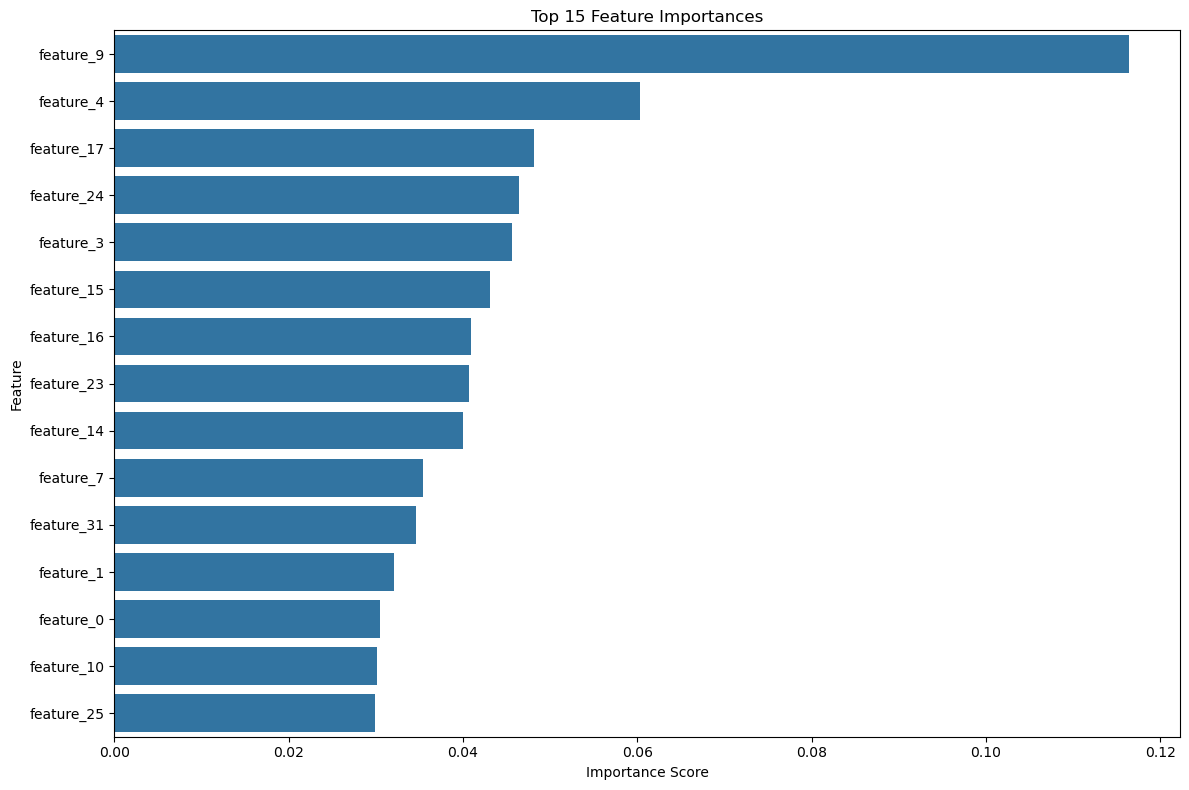

Features selected based on importance > 0.02:
['feature_9', 'feature_4', 'feature_17', 'feature_24', 'feature_3', 'feature_15', 'feature_16', 'feature_23', 'feature_14', 'feature_7', 'feature_31', 'feature_1', 'feature_0', 'feature_10', 'feature_25', 'feature_27', 'feature_22', 'feature_5', 'feature_8', 'feature_18', 'feature_12', 'feature_2']


In [7]:
# --- Visualizing Feature Importance ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Display top 15 features
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Feature Selection based on Importance Threshold ---
# Example: Select features with importance greater than a certain threshold
# This threshold is often determined empirically or by looking at the distribution
importance_threshold = 0.02 # Example threshold

selected_features = feature_importance_df[feature_importance_df['importance'] > importance_threshold]['feature'].tolist()

print(f"Features selected based on importance > {importance_threshold}:")
print(selected_features)

**Relative Importance**: Feature importance scores are typically relative. A score of 0.2 for feature A and 0.1 for feature B means feature A is twice as important as feature B according to this specific model and calculation method.

**Thresholding for Selection**: You can set a threshold (e.g., based on the distribution of scores or a desired number of features) and select features whose importance exceeds it. This is a common way to perform embedded feature selection.

**Model-Specific**: Remember that feature importance is model-specific. A feature important for a Random Forest might not be as important for a Logistic Regression model, and vice-versa. It's often beneficial to examine feature importance from multiple models.

**Permutation Importance Caveats**: While powerful, permutation importance can be computationally expensive, especially for large datasets and complex models. Also, if features are highly correlated, shuffling one might not significantly impact performance if its information is contained in another correlated feature, potentially underestimating its true importance.



### The Power of Domain Knowledge
Domain knowledge allows you to:

##### Identify meaningful relationships: 
Understand how different variables interact in the real world.
##### Create relevant features:
Engineer features that directly capture business logic or scientific principles.
##### Interpret results effectively:
Understand why certain features are important and how the model is making decisions.

## Creating a 'Purchase Frequency' Feature

In [10]:
import numpy as np
transaction_data = {
    'customer_id': [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4],
    'order_date': [
        '2023-01-15', '2023-02-20', '2023-04-10',
        '2023-01-01', '2023-03-15',
        '2023-01-05', '2023-01-25', '2023-03-01', '2023-05-10',
        '2023-02-01', '2023-02-10', '2023-02-20', '2023-03-05', '2023-03-15'
    ]
}
transaction_df = pd.DataFrame(transaction_data)
transaction_df['order_date'] = pd.to_datetime(transaction_df['order_date'])
print("Original Transaction Data:")
print(transaction_df.head())

Original Transaction Data:
   customer_id order_date
0            1 2023-01-15
1            1 2023-02-20
2            1 2023-04-10
3            2 2023-01-01
4            2 2023-03-15


In [14]:
# --- Domain-Specific Feature Engineering: Purchase Frequency ---
# 1. Calculating no. of orders per customer
orders_per_customer = transaction_df.groupby('customer_id').size().reset_index(name='order_count')

# 2. Calculate the time span for each customer's purchases
# We need the min and max date for each customer
min_max_dates = transaction_df.groupby('customer_id')['order_date'].agg(['min','max'])
# Calculate the duration in days
min_max_dates['duration_days'] = (min_max_dates['max'] - min_max_dates['min']).dt.days
# Handle cases where a customer has only one order (duration is 0)
# In this case, frequency is typically considered 0 or undefined, or we might use a default.
# For simplicity, let's set duration to 1 day if it's 0 to avoid division by zero.
min_max_dates['duration_days'] = min_max_dates['duration_days'].replace(0,1)

# 3. Merge order counts with min/max dates
customer_feature = pd.merge(orders_per_customer, min_max_dates, on='customer_id')

# 4. Calculate Purchase Frequency
# Frequency can be defined as (Number of Orders - 1) / Duration (if duration > 0)
# We use (Number of Orders - 1) because the first order does not represent a 'gap' between purchases.
# If a customer has only 1 order, (1-1)/duration = 0 frequency.
customer_feature['purchase_frequency']=(customer_feature['order_count']-1)/customer_feature['duration_days']

# For customers with 1 order, frequency should be 0.
customer_feature['purchase_frequency'] = customer_feature['purchase_frequency'].apply(lambda x: max(0, x))

print("Customer Features including Purchase Frequency:")
print(customer_feature)

Customer Features including Purchase Frequency:
   customer_id  order_count        min        max  duration_days  \
0            1            3 2023-01-15 2023-04-10             85   
1            2            2 2023-01-01 2023-03-15             73   
2            3            4 2023-01-05 2023-05-10            125   
3            4            5 2023-02-01 2023-03-15             42   

   purchase_frequency  
0            0.023529  
1            0.013699  
2            0.024000  
3            0.095238  


## Key Principles for Effective Feature Engineering

- **Understand Your Data:**  
  Explore data using visualizations, summary statistics, and domain knowledge.

- **Iterative Process:**  
  Create features → train model → evaluate → refine features.

- **Avoid Data Leakage:**  
  Compute statistics (mean, std, median) only on training data, then apply to test data.

- **Keep it Simple Initially:**  
  Start with simple features to avoid overfitting and improve interpretability.

- **Document Everything:**  
  Record created features, reasoning, and their impact for reproducibility.

- **Consider Feature Scaling:**  
  Apply Standardization or Normalization after feature creation.

- **Handle Missing Values Thoughtfully:**  
  Choose imputation strategies based on data characteristics.

- **Feature Selection is Crucial:**  
  Remove irrelevant or redundant features to simplify the model.

- **Test Feature Engineering Hypotheses:**  
  Treat feature creation as hypothesis testing and validate empirically.

- **Automate Where Possible:**  
  Use tools like Featuretools, but always validate with domain knowledge.
